# 4.6 Lab: Logistic Regression, LDA, QDA, and KNN



<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#5.3.1-The-Validation-Set-Approach">The Validation Set Approach</a></li>
        <li><a href="#5.3.2-Leave-One-Out-Cross-Validation">Leave-One-Out Cross-Validation</a></li>
        <li><a href="#5.3.3-k-Fold-Cross-Validation">k-Fold Cross-Validation</a></li>
        <li><a href="#5.3.4-The-Bootstrap">The Bootstrap</a></li>
    </ol>
</div>


In this lab, we explore the resampling techniques covered in this chapter


## _5.3.1 The Validation Set Approach_

We explore the use of the validation set approach in order to estimate the test error rates that result from fitting various linear models on the **Auto** data set.
> You can download the data set for from **[here](https://drive.google.com/file/d/1hrotP0JbpDXTCVKjaGi0WJl1IdAjHqrO/view?usp=sharing)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
auto = pd.read_csv('Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [4]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
auto['horsepower'] = auto['horsepower'].replace('?', '105')
auto = auto.astype({'horsepower':'int32'})
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null int32
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 26.5+ KB


We begin by using `sklearn` function to split the set of observations into two halves, by selecting a random subset of 196 observations out of the original 392 observations. We refer to these observations as the training set.

In [6]:
X = auto.iloc[:, 1:-1]
y = auto.iloc[:, 0]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

We start by fitting the linear model into the training set with **mpg** and **hp**.

In [8]:
hp_train = X_train[['horsepower']].values
hp_test = X_test[['horsepower']].values

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
lm1 = lm.fit(hp_train, y_train)
pred = lm1.predict(hp_test)
print(mean_squared_error(y_test, pred))

24.627375790258384


* the estimated test MSE for the linear regression fit is 24.63

We can use the `polynomial` function to estimate the test error for the polynomial
and cubic regressions.

from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree=2) # we choose the degree of the polynomial function
poly2_train = poly2.fit_transform(X_train) # we fit into the train data and then transform
poly2_test = poly2.transform(X_test) # but we only transform the data of the trainning set
pm = lm.fit(poly2_train, y_train) # we simply run linear model with transformed data
y_pred2 = pm.predict(poly2_test)

In [10]:
from sklearn.preprocessing import PolynomialFeatures

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(hp_train)
X_test2 = poly.transform(hp_test)
model = lm1.fit(X_train2, y_train)
print(mean_squared_error(y_test, model.predict(X_test2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(hp_train)
X_test3 = poly.transform(hp_test)

model1 = lm1.fit(X_train3, y_train)
print(mean_squared_error(y_test, model1.predict(X_test3)))

19.523081625165556
19.691109995296056


* For a Quadratic, the model error rate is 19.52
* For a Cubic model, the error rate is 19.69

If we choose a different training set instead, then we will obtain somewhat different errors on the validation set.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [12]:
hp_train = X_train[['horsepower']].values
hp_test = X_test[['horsepower']].values

In [13]:
# Linear
lm = LinearRegression()
lm1 = lm.fit(hp_train, y_train)
pred = lm1.predict(hp_test)
print(mean_squared_error(y_test, pred))

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(hp_train)
X_test2 = poly.transform(hp_test)
model = lm1.fit(X_train2, y_train)
print(mean_squared_error(y_test, model.predict(X_test2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(hp_train)
X_test3 = poly.transform(hp_test)

model1 = lm1.fit(X_train3, y_train)
print(mean_squared_error(y_test, model1.predict(X_test3)))

24.16498032778625
19.142361681198697
19.6895604435906


Using this split of the observations into a training set and a validation set, we find that the validation set error rates for the models:
* with the linear term is 24.16
* with the quadratic term is 19.14
* with cubic terms is 19.69

We can run multiple polynomials and compare their results. For that, I will use the function which calculates MSE's for a range of polynomial models.

In [14]:
def poly_mse(X_train, X_test, y_train, y_test, degree=10):
    mses = []
    degrees = []
    for deg in range (1, degree+1):
        poly_reg = PolynomialFeatures(degree= deg)
        poly_train = poly_reg.fit_transform(X_train)
        poly_test = poly_reg.transform(X_test)
        pred = lm.fit(poly_train, y_train).predict(poly_test)
        MSE = mean_squared_error(y_test, pred)
        print('Polynomial model with {} degrees has the MSE of {}'.format(deg,
              round(MSE, 4)))
        mses.append(MSE)
        degrees.append(deg)
    return mses, degrees

In [15]:
mses, degrees = poly_mse(hp_train, hp_test, y_train, y_test)

Polynomial model with 1 degrees has the MSE of 24.165
Polynomial model with 2 degrees has the MSE of 19.1424
Polynomial model with 3 degrees has the MSE of 19.6896
Polynomial model with 4 degrees has the MSE of 20.1684
Polynomial model with 5 degrees has the MSE of 19.6966
Polynomial model with 6 degrees has the MSE of 19.4147
Polynomial model with 7 degrees has the MSE of 19.699
Polynomial model with 8 degrees has the MSE of 19.9226
Polynomial model with 9 degrees has the MSE of 19.9133
Polynomial model with 10 degrees has the MSE of 19.7294


Let's plot a graph to visualize our findings.

(1, 10)

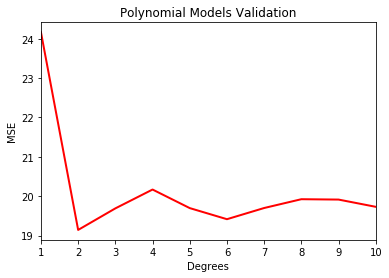

In [16]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(degrees, mses, linewidth=2, color='r')
ax.set_title('Polynomial Models Validation')
ax.set_ylabel('MSE')
ax.set_xlabel('Degrees')
ax.set_xlim(1, 10)

These results are consistent with our previous findings: a model that predicts **mpg** using a quadratic function of **horsepower** performs better than a model that involves only a linear function of **horsepower**, and there is little evidence in favor of a model that uses a cubic function of **horsepower**.

--------
## _5.3.2 Leave-One-Out Cross-Validation_

The LOOCV estimate can be automatically computed for any generalized linear model using the `LeaveOneOut()` and `KFold()` functions.

In [17]:
linear_model = lm.fit(X_train, y_train)

from sklearn.model_selection import LeaveOneOut # import LOOCV
loo = LeaveOneOut()
loo.get_n_splits(X)

397

In [18]:
X2 = X[['horsepower']]
X2 = X2.values
y2 = y.values

In python we don't have specific function to use the LOOCV, but the same result can be achieved by setting `kFold()` bin number to the LOO amount

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
loocv = KFold(n_splits=392, random_state=0, shuffle=False)

loocv_results = cross_val_score(linear_model, X2, y2, scoring='neg_mean_squared_error', cv=loocv)
mean_mse = np.abs(loocv_results).mean()
print('LOOCV with {} folds has the MSE: {}'.format(str(len(loocv_results)), round(mean_mse, 4)))

LOOCV with 392 folds has the MSE: 24.9644


We can repeat this procedure for increasingly complex polynomial fits. To automate the process and not repeat each step multiple times I will convert it into the function which takes X and y values, a number of k-Folds, and the number of degrees we want to run our model.

In [20]:
def cross_val_kfold(X, y, k, degree):
    accu_mean = []
    for d in range (1, degree+1):
        model = PolynomialFeatures(degree= d)
        X_transformed = model.fit_transform(X)
        pm = lm.fit(X_transformed, y)
        accuracy = - cross_val_score(estimator=pm, X=X_transformed, y=y, cv=k,
                                   scoring='neg_mean_squared_error').mean()
        print('Polynomial Degree: {}, \tMSE: {}'.format(d, round(accuracy, 4)))
        accu_mean.append(accuracy)

In [21]:
cross_val_kfold(X2, y2, loocv, 5)

Polynomial Degree: 1, 	MSE: 24.9644
Polynomial Degree: 2, 	MSE: 20.6398
Polynomial Degree: 3, 	MSE: 20.7481
Polynomial Degree: 4, 	MSE: 20.8618
Polynomial Degree: 5, 	MSE: 20.5814


We see a sharp drop in the estimated test MSE between the linear and quadratic fits, but then no clear improvement from using
higher-order polynomials.

---------
## _5.3.3 k-Fold Cross-Validation_
As mentioned above we will use the same `KFold` function to implement k-Fold Cross-Validation. We start by using k=10, which is a common choice for k.

the CV errors corresponding to the polynomial fit of orders one to ten.

In [22]:
kf = KFold(n_splits=10, random_state=0, shuffle=False)
accu_mean = cross_val_kfold(X2, y2, kf, 10)

Polynomial Degree: 1, 	MSE: 28.4122
Polynomial Degree: 2, 	MSE: 22.5188
Polynomial Degree: 3, 	MSE: 22.6204
Polynomial Degree: 4, 	MSE: 22.6927
Polynomial Degree: 5, 	MSE: 22.4232
Polynomial Degree: 6, 	MSE: 22.3025
Polynomial Degree: 7, 	MSE: 22.4999
Polynomial Degree: 8, 	MSE: 22.582
Polynomial Degree: 9, 	MSE: 22.5067
Polynomial Degree: 10, 	MSE: 22.4745


The computation time is much shorter than that of LOOCV. We still see little evidence that using cubic or higher-order polynomial terms leads to lower test error than simply using a quadratic fit. We also see that MSE has slightly increased compared to the validation set approach. 

We saw that the two errors of the cross-validation are essentially the same when LOOCV is performed. When we instead perform a k-fold CV, then the two numbers differ slightly. This is because with added precision while testing we reduced bias and this slightly increased the variance.

---------
## _5.3.4 The Bootstrap_

We illustrate the use of the bootstrap in the simple example involving estimating the accuracy of the linear regression model on the **Auto** data set.

### Estimating the Accuracy of a Statistic of Interest
One of the great advantages of the bootstrap approach is that it can be applied in almost all situations. No complicated mathematical calculations are required

* First, we must create a function that computes the statistic of interest.
* Second, we perform bootstrap by repeatedly sampling observations from the data set with replacement.

The Portfolio data set in the ISLR package has variables called X and Y.
> Get the data set from **[here](https://drive.google.com/file/d/1fKYDMtJqrok3g-Ak3YZwqwA55u-k3BLV/view?usp=sharing)**

In [23]:
portfolio = pd.read_csv('Portfolio.csv')
portfolio.head()

,X,Y
0,-0.895251,-0.234924
1,-1.562454,-0.885176
2,-0.417090,0.271888
3,1.044356,-0.734198
4,-0.315568,0.841983


In [24]:
portfolio.describe()

,X,Y
count,100.000000,100.000000
mean,-0.077132,-0.096945
std,1.062376,1.143782
min,-2.432764,-2.725281
25%,-0.888474,-0.885722
50%,-0.268889,-0.228708
75%,0.558093,0.806708
max,2.460336,2.565985


In [25]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
X    100 non-null float64
Y    100 non-null float64
dtypes: float64(2)
memory usage: 1.7 KB


There is no specific function to perform the bootstrap but we can easily create one, which takes input (X, Y) and returns the estimate for $\alpha$.

In [26]:
def alpha_calc(X, y):
    alpha = ((np.var(y) - np.cov(X,y)) / (np.var(X) + np.var(y) - 2 * np.cov(X,y)))
    return alpha

This function returns, or outputs, an estimate for $\alpha$. For instance, the following command tells `python` to estimate $\alpha$ using all 100 observations.

In [27]:
X = portfolio['X'][0:100]
y = portfolio['Y'][0:100]
print(alpha_calc(X, y)[0])

[1.07270947 0.57665115]


We can create a function that will allow us to perform a random selection of 100 observations from the range of one to 100 with replacement. This is similar to building a new bootstrap data set and calculating $\alpha$ based on the new data set.

In [28]:
def bootstrap(df, fraction, n):
    result = 0
    for i in range(0, n + 1):
        sample = df.sample(frac= fraction, replace=True)
        X = sample.X[:100]
        y = sample.Y[:100]
        alpha_result = alpha_calc(X,y)
        result += alpha_result
    final_result = result / n
    return final_result

print(bootstrap(portfolio, 1, 1000)[0])

[0.96081732 0.5795274 ]


The final output shows that using the original data, $\alpha$ is approximately 0.58.


### Estimating the Accuracy of a Linear Regression Model

The bootstrap approach can be used to assess the variability of the coefficient estimates and predictions from a statistical learning method. Here we use the bootstrap approach to assess the variability of the estimates for $β_0$ and $β_1$, the intercept and slope terms for the linear regression model that uses **horsepower** to predict **mpg** in the **Auto** data set. We will compare the estimates obtained using the bootstrap to those obtained using the formulas for $SE(\hat{\beta}_0)$ and $SE(\hat{\beta}_1)$ described in Lab 3.

In [29]:
X3 = auto[['horsepower']].values
y3 = auto['mpg']
bootl = lm.fit(X3, y3)

print('Coeficient: \tIntercept:\n',
     bootl.coef_, '\t', bootl.intercept_)

Coeficient: 	Intercept:
 [-0.15781924] 	 40.004202891898615


We can use the same approach to create bootstrap estimates for the intercept and slope terms by randomly sampling from among the observations with replacement. We can compute the standard errors of 1,000 bootstrap estimates for the intercept and slope terms.

In [30]:
from sklearn.utils import resample

X_sample, y_sample = resample(X3, y3, n_samples=1000)
bootl2 = lm.fit(X_sample,y_sample)

print('Coeficient: \tIntercept:\n',
     bootl2.coef_, '\t', bootl2.intercept_)

Coeficient: 	Intercept:
 [-0.16079905] 	 40.4657628966397
